##### Import necessary libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Load Dataset

In [20]:
df=pd.read_csv(r"C:\Users\lenovo\Downloads\waterQuality1.csv")
data=df.copy()  # copying the data so that main data will not be changed

In [17]:
data.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


##### Data Preprocessing

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

##### Description
- All attributes are numeric variables and they are listed bellow:

- aluminium - dangerous if greater than 2.8
- ammonia - dangerous if greater than 32.5
- arsenic - dangerous if greater than 0.01
- barium - dangerous if greater than 2
- cadmium - dangerous if greater than 0.005
- chloramine - dangerous if greater than 4
- chromium - dangerous if greater than 0.1
- copper - dangerous if greater than 1.3
- flouride - dangerous if greater than 1.5
- bacteria - dangerous if greater than 0
- viruses - dangerous if greater than 0
- lead - dangerous if greater than 0.015
- nitrates - dangerous if greater than 10
- nitrites - dangerous if greater than 1
- mercury - dangerous if greater than 0.002
- perchlorate - dangerous if greater than 56
- radium - dangerous if greater than 5
- selenium - dangerous if greater than 0.5
- silver - dangerous if greater than 0.1
- uranium - dangerous if greater than 0.3
- is_safe - class attribute {0 - not safe, 1 - safe}

In [25]:
data.shape

(7999, 21)

In [29]:
data.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [31]:
data.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [39]:
data[data.ammonia=='#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


##### Insights
- We can see that there are non-numeric characters which is affecting the datatype of column

In [193]:
data[data.duplicated()]

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe


##### Insights
- Data does not have duplicated rows

In [42]:
data= data.replace('#NUM!',0)

In [46]:
data['ammonia'] = data['ammonia'].astype(float)
data['is_safe'] = data['is_safe'].astype(int)

##### Insights
- replaced the non-integer value to 0
- converting the data types of ammonia and is_safe

In [53]:
data.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,...,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,14.272857,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,...,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673,0.114014
std,1.265145,8.881569,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,...,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904,0.317848
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.560000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.130000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [55]:
data.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

##### Exploratory Data Analysis

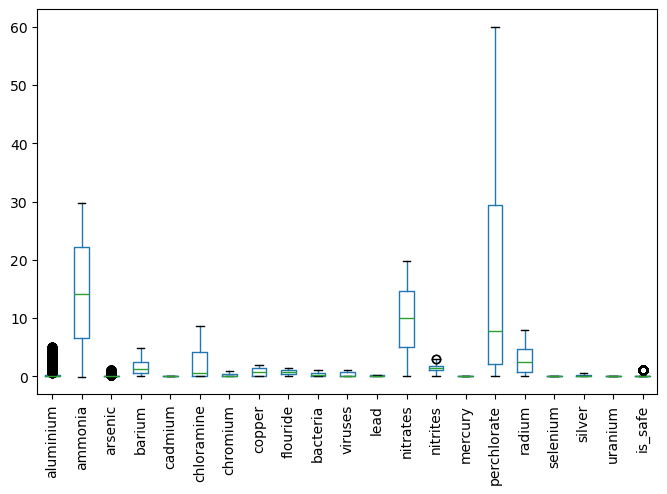

In [70]:
data.boxplot(figsize=(8, 5), grid=False)
plt.xticks(rotation=90)
plt.show()

##### Insights
- By looking at the plot we can say that most of the outliers are in aluminium and arsenic
- These outliers are useful for analysis and prediction
- To handle these outliers we use normalization before building the model

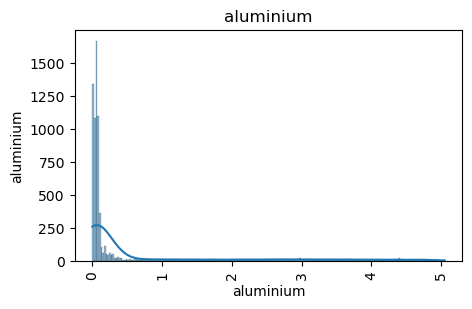

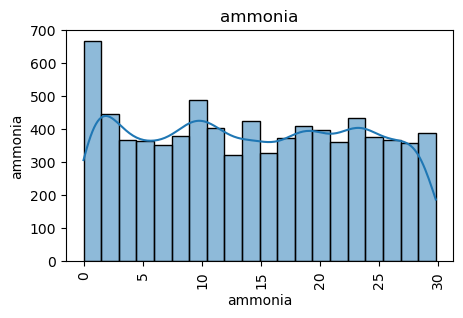

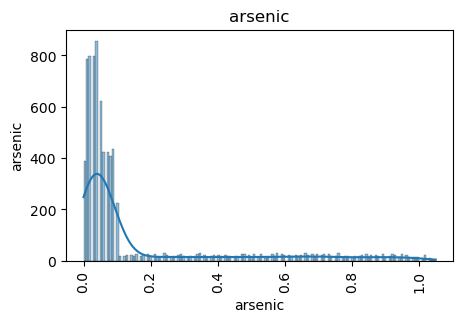

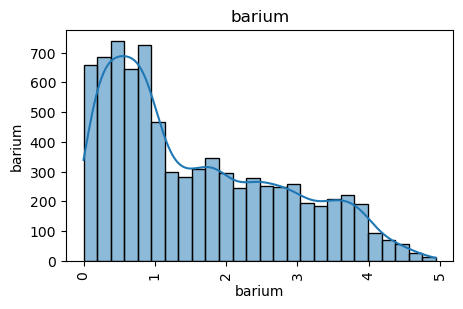

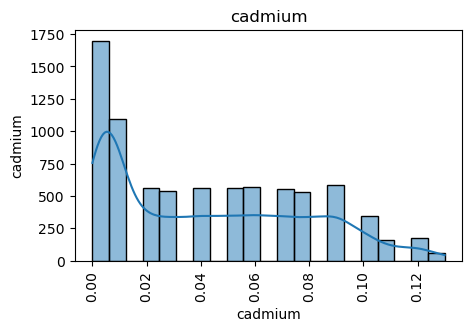

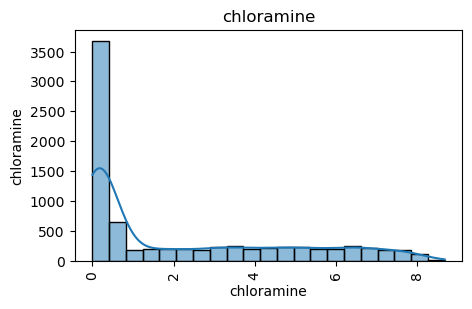

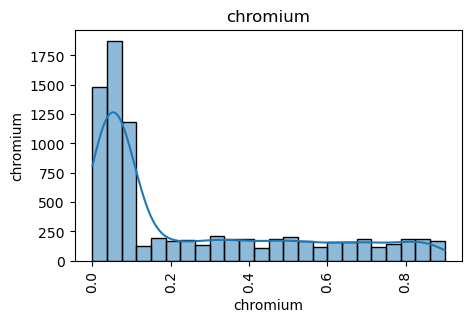

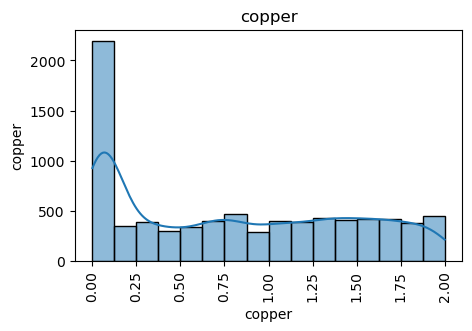

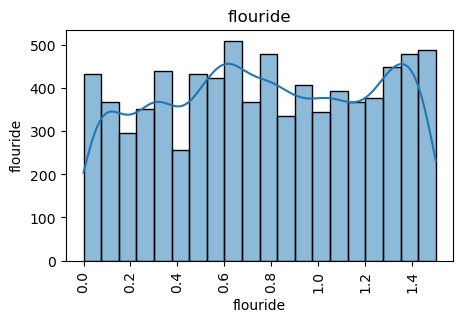

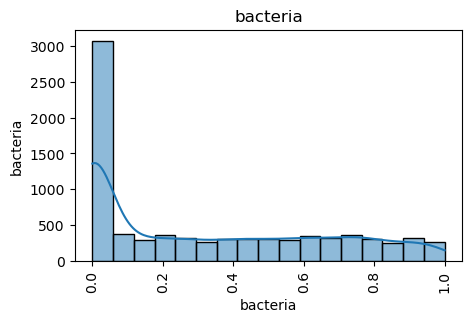

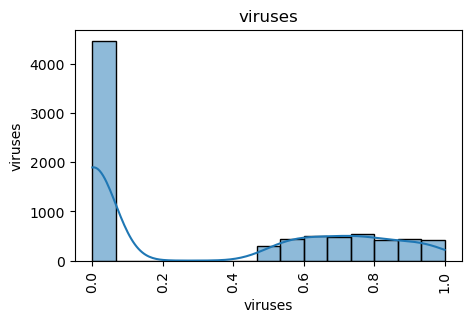

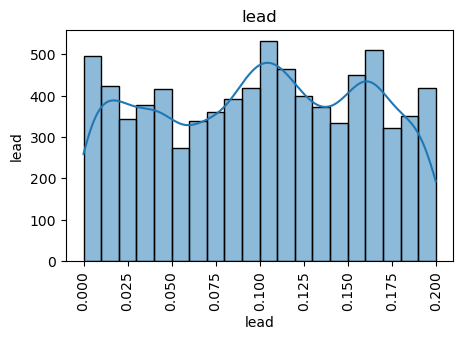

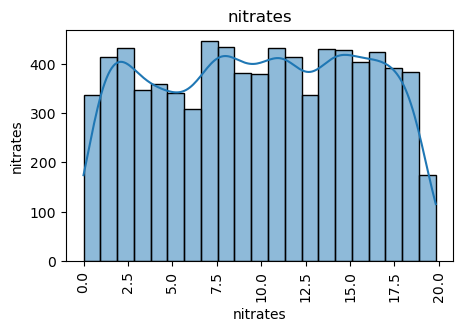

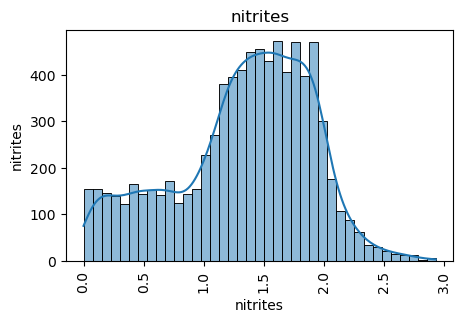

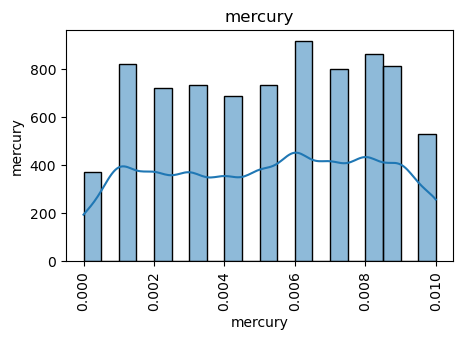

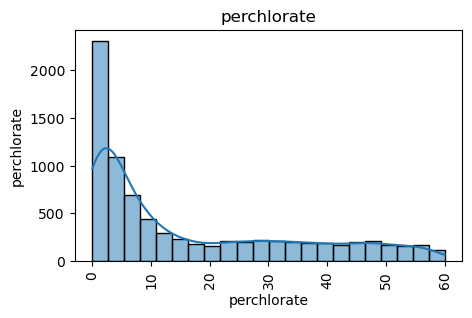

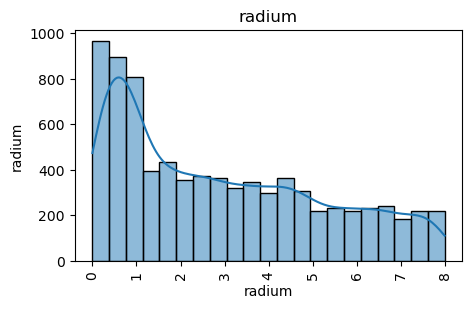

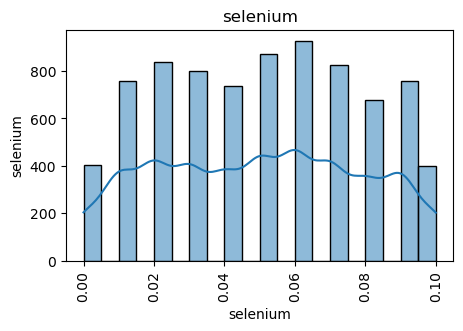

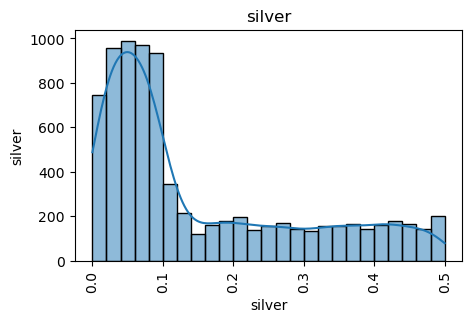

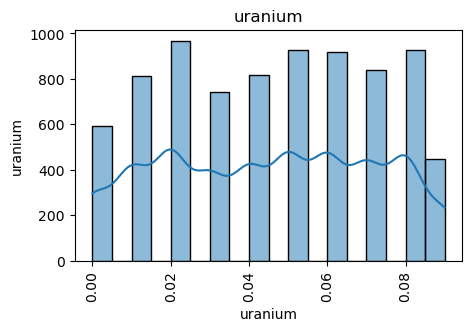

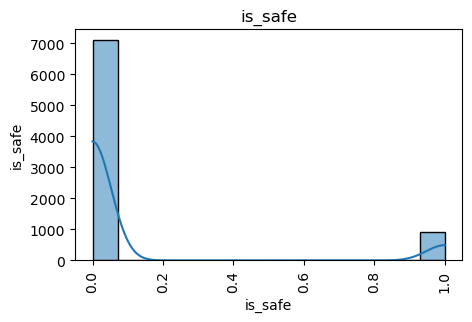

In [87]:
for i in data.columns:
    plt.figure(figsize=(5, 3))  # Set figure size
    sns.histplot(data=data,x=i,kde=True)
    plt.title(i)  # Add title for each column
    plt.xticks(rotation=90)  # Rotate x-axis labels if necessary
    plt.ylabel(i)  # Set y-axis label
    plt.show()

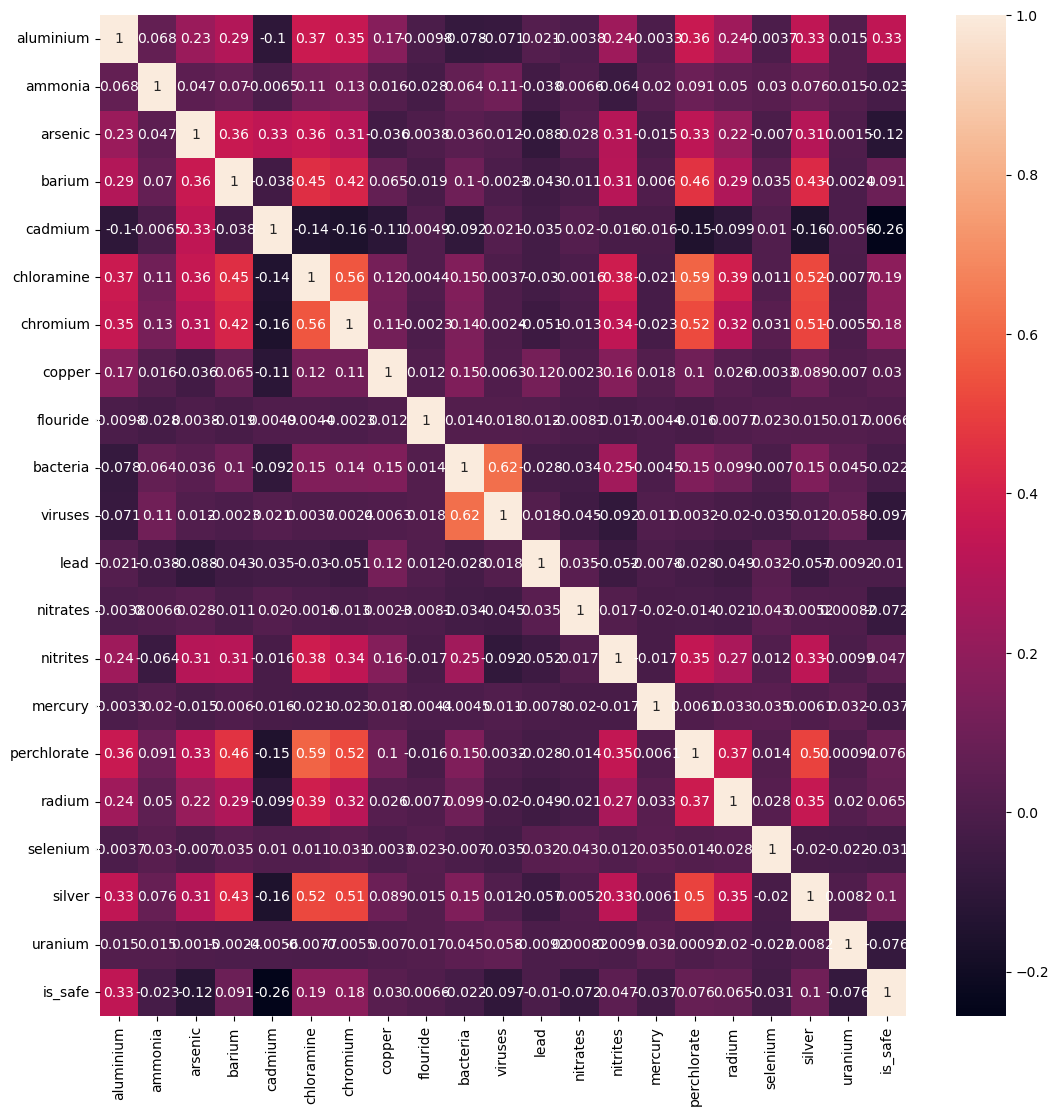

In [109]:
plt.figure(figsize=(13,13))
sns.heatmap(data.corr(),annot=True)
plt.show()

##### Insights
from the heatmap we can say that there are very less columns with good correlation most of the columns are having negative correlation

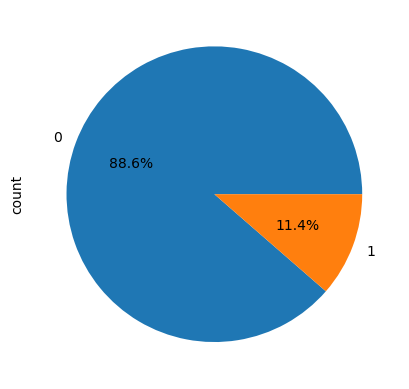

In [102]:
data['is_safe'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()

##### Insights
- Most of the water in data is not_safe
- We can say that the data is unbalanced

#### Splitting the Dataset

In [114]:
fv=data.iloc[:,0:-1]
cv=data.iloc[:,-1]

In [116]:
fv.head()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,0.000,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,0.650,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,0.003,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,0.710,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,0.001,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02


In [118]:
cv.head()

0    1
1    1
2    0
3    1
4    1
Name: is_safe, dtype: int32

In [124]:
import sklearn
from sklearn.model_selection import train_test_split

##### Splitting the data to train and test

In [126]:
x_train,x_test,y_train,y_test=train_test_split(fv,cv,test_size=0.20,stratify=cv)

##### Splitting the data to training and cross-validation

In [128]:
xf_train,x_cv,yf_train,y_cv=train_test_split(x_train,y_train,test_size=0.20,stratify=y_train)

##### Normalization

In [163]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train_f=std.fit_transform(x_train)
x_test_f=std.transform(x_test)
x_cv_f=std.transform(x_cv)

##### Model Selection

In [133]:
from sklearn.linear_model import LogisticRegression

In [165]:
def objective(trial):
    # Suggest hyperparameters for Logistic Regression
    solver, penalty = trial.suggest_categorical(
        "choice", 
        [("lbfgs", "l2"), ("sag", "l2"), ("saga", "l2"), ("saga", "l1"), ("saga", "elasticnet")]
    )
    C = trial.suggest_float("C", 0.01, 100, log=True)  # Log-uniform for regularization strength
    
    # Define Logistic Regression model based on penalty type
    if penalty == "elasticnet":
        model = LogisticRegression(
            C=C, solver=solver, penalty=penalty, multi_class="multinomial", l1_ratio=0.3
        )
    else:
        model = LogisticRegression(
            C=C, solver=solver, penalty=penalty, multi_class="multinomial"
        )

    # Perform cross-validation and return the mean negative log loss
    score = cross_val_score(model, x_train_f, y_train, cv=5, scoring="neg_log_loss").mean()
    return score

# Create and run the Optuna study
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

# Print the best parameters and score
print("Best Parameters:", study.best_params)
print("Best Score:", study.best_value)

[I 2025-01-27 13:15:18,739] A new study created in memory with name: no-name-6a52d7bc-2fb0-4f7d-a665-3153ce91e429
C:\Users\lenovo\anaconda3\anacondapython\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('lbfgs', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\lenovo\anaconda3\anacondapython\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('sag', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\lenovo\anaconda3\anacondapython\Lib\site-packages\optuna\distributions.py:524: UserWarning: Choices for a categorical distribution should be a tuple of None, bool, int, float and str for persistent storage but contains ('saga', 'l2') which is of type tuple.
  warnings.warn(message)
C:\Users\l

Best Parameters: {'choice': ('sag', 'l2'), 'C': 0.0663283691043242}
Best Score: -0.2488418046003459


In [167]:
study.best_params

{'choice': ('sag', 'l2'), 'C': 0.0663283691043242}

In [169]:
study.best_trial

FrozenTrial(number=73, state=1, values=[-0.2488418046003459], datetime_start=datetime.datetime(2025, 1, 27, 13, 16, 9, 81074), datetime_complete=datetime.datetime(2025, 1, 27, 13, 16, 9, 709376), params={'choice': ('sag', 'l2'), 'C': 0.0663283691043242}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'choice': CategoricalDistribution(choices=(('lbfgs', 'l2'), ('sag', 'l2'), ('saga', 'l2'), ('saga', 'l1'), ('saga', 'elasticnet'))), 'C': FloatDistribution(high=100.0, log=True, low=0.01, step=None)}, trial_id=73, value=None)

In [171]:
model=LogisticRegression(C=0.0663283691043242,solver="sag",penalty="l2",multi_class="multinomial")

In [175]:
model.fit(x_train_f, y_train)

LogisticRegression(C=0.0663283691043242, multi_class='multinomial',
                   solver='sag')

In [179]:
pred_yi=model.predict_proba(x_cv_f)

In [181]:
from sklearn.metrics import log_loss
log_loss(y_cv, pred_yi)

0.2557568797424657

##### Insights
- We have got an ideal loss of 0.25 which is near to 0 and the model is working very well

In [184]:
pred_test=model.predict_proba(x_test_f)

In [186]:
log_loss(y_test, pred_test)

0.2558630867396938